In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from citipy import citipy
import json
import timeit

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
import requests

In [5]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


587

In [7]:
import time
from datetime import datetime

In [8]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | sorvag
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | svetlyy
Processing Record 15 of Set 1 | urucara
Processing Record 16 of Set 1 | kuche
City not found. Skipping...
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | ventspils
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set

Processing Record 39 of Set 4 | zhezkazgan
Processing Record 40 of Set 4 | kieta
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | la joya
Processing Record 43 of Set 4 | orasac
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | colesberg
Processing Record 47 of Set 4 | hirado
Processing Record 48 of Set 4 | presidencia roque saenz pena
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | comodoro rivadavia
Processing Record 1 of Set 5 | touho
Processing Record 2 of Set 5 | sumbe
Processing Record 3 of Set 5 | tromso
Processing Record 4 of Set 5 | kendari
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | bogalusa
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | north bend
Processing Record 10 of Set 5 | abonnema
Processing Record 11 of Set 5 | yinchuan
Processing

Processing Record 25 of Set 8 | mindelo
Processing Record 26 of Set 8 | del rio
Processing Record 27 of Set 8 | oranjemund
Processing Record 28 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | nkoteng
Processing Record 31 of Set 8 | coxim
Processing Record 32 of Set 8 | vestnes
Processing Record 33 of Set 8 | monchique
Processing Record 34 of Set 8 | amapa
Processing Record 35 of Set 8 | klaksvik
Processing Record 36 of Set 8 | maniitsoq
Processing Record 37 of Set 8 | whitehorse
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | oskarshamn
Processing Record 40 of Set 8 | east london
Processing Record 41 of Set 8 | arlit
Processing Record 42 of Set 8 | gualeguaychu
Processing Record 43 of Set 8 | caceres
Processing Record 44 of Set 8 | umea
Processing Record 45 of Set 8 | san javier
Processing Record 46 of Set 8 | matara
Processing Record 47 of Set 8 | coquimbo
Processi

Processing Record 11 of Set 12 | merauke
Processing Record 12 of Set 12 | alekseyevsk
Processing Record 13 of Set 12 | muscat
Processing Record 14 of Set 12 | black river
Processing Record 15 of Set 12 | nuuk
Processing Record 16 of Set 12 | benjamin constant
Processing Record 17 of Set 12 | powell
Processing Record 18 of Set 12 | nador
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 22 of Set 12 | kukushtan
Processing Record 23 of Set 12 | makung
City not found. Skipping...
Processing Record 24 of Set 12 | bontang
Processing Record 25 of Set 12 | oussouye
Processing Record 26 of Set 12 | campina grande do sul
Processing Record 27 of Set 12 | kos
Processing Record 28 of Set 12 | surt
Processing Record 29 of Set 12 | verkhnevilyuysk
Processing Record 30 of Set 12 | bowen
Processing Record 31 of Set 12 | baruun-urt
Processing Record 32 of Set 12 | college
Processing R

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,28.31,96,99,1.59,RU,2022-05-07 17:58:51
1,Tuatapere,-46.1333,167.6833,55.04,89,79,3.11,NZ,2022-05-07 17:58:52
2,Bredasdorp,-34.5322,20.0403,54.86,83,8,4.47,ZA,2022-05-07 17:58:52
3,Lata,40.1629,-8.3327,74.07,42,100,6.76,PT,2022-05-07 17:58:52
4,New Norfolk,-42.7826,147.0587,51.30,65,51,1.99,AU,2022-05-07 17:58:53
5,Hermanus,-34.4187,19.2345,56.80,77,11,8.05,ZA,2022-05-07 17:54:08
6,Necochea,-38.5473,-58.7368,73.22,46,70,14.94,AR,2022-05-07 17:58:53
7,Los Llanos De Aridane,28.6585,-17.9182,67.75,68,20,11.50,ES,2022-05-07 17:58:54
8,Rikitea,-23.1203,-134.9692,77.34,82,70,12.68,PF,2022-05-07 17:58:54
9,Fairbanks,64.8378,-147.7164,42.30,95,100,0.00,US,2022-05-07 17:55:03


In [10]:

output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

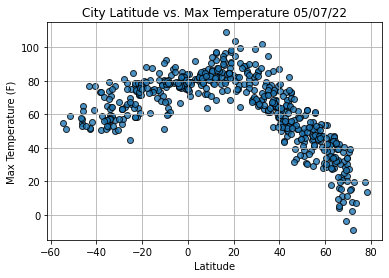

In [12]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

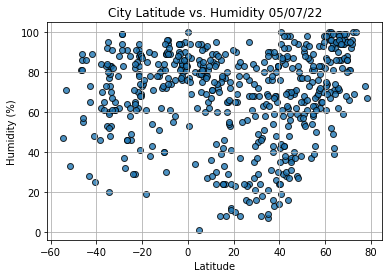

In [13]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

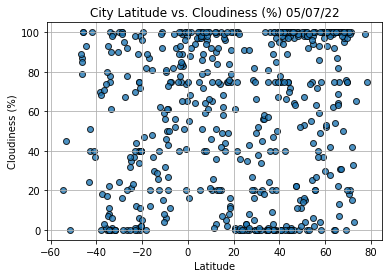

In [14]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

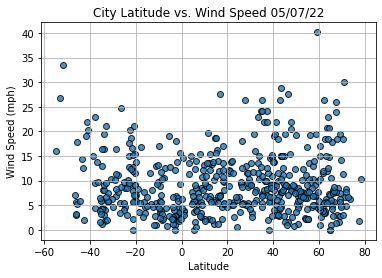

In [15]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                      Urucara
Lat                       -2.5364
Lng                        -57.76
Max Temp                    84.94
Humidity                       76
Cloudiness                     89
Wind Speed                    2.8
Country                        BR
Date          2022-05-07 17:58:55
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
532     True
533    False
534     True
535    False
536     True
Name: Lat, Length: 537, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,28.31,96,99,1.59,RU,2022-05-07 17:58:51
3,Lata,40.1629,-8.3327,74.07,42,100,6.76,PT,2022-05-07 17:58:52
7,Los Llanos De Aridane,28.6585,-17.9182,67.75,68,20,11.50,ES,2022-05-07 17:58:54
9,Fairbanks,64.8378,-147.7164,42.30,95,100,0.00,US,2022-05-07 17:55:03
12,Svetlyy,54.6750,20.1347,55.45,89,98,6.58,RU,2022-05-07 17:58:55
...,...,...,...,...,...,...,...,...,...
530,Baruun-Urt,46.6806,113.2792,39.31,37,63,7.02,MN,2022-05-07 18:13:22
531,College,64.8569,-147.8028,42.58,95,100,0.00,US,2022-05-07 18:13:22
532,Pangody,65.8500,74.4859,5.09,96,7,4.34,RU,2022-05-07 18:09:47
534,Yar-Sale,66.8333,70.8333,15.37,94,31,8.72,RU,2022-05-07 18:13:24


In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,28.31,96,99,1.59,RU,2022-05-07 17:58:51
3,Lata,40.1629,-8.3327,74.07,42,100,6.76,PT,2022-05-07 17:58:52
7,Los Llanos De Aridane,28.6585,-17.9182,67.75,68,20,11.50,ES,2022-05-07 17:58:54
9,Fairbanks,64.8378,-147.7164,42.30,95,100,0.00,US,2022-05-07 17:55:03
12,Svetlyy,54.6750,20.1347,55.45,89,98,6.58,RU,2022-05-07 17:58:55


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


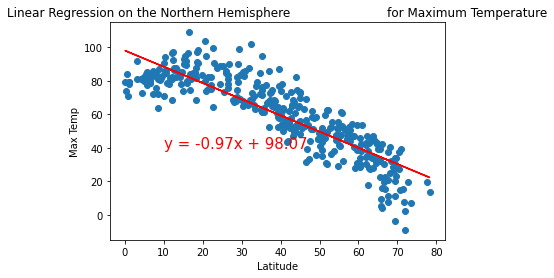

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

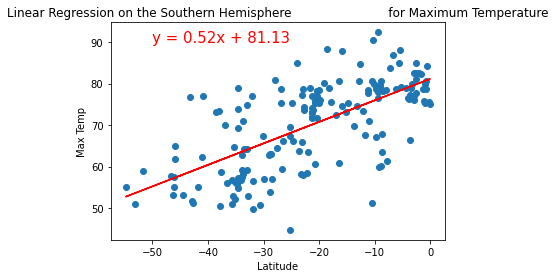

In [23]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

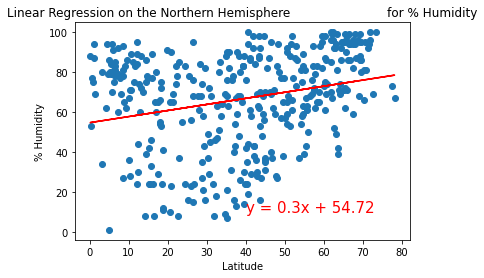

In [24]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

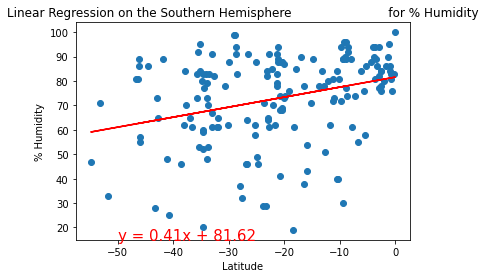

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

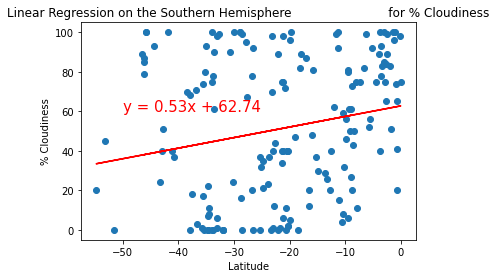

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

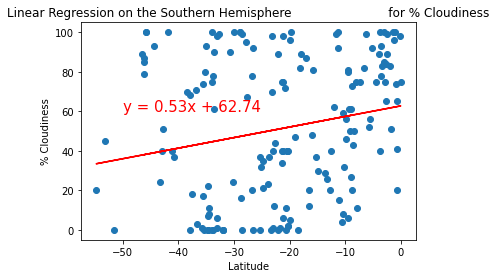

In [27]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

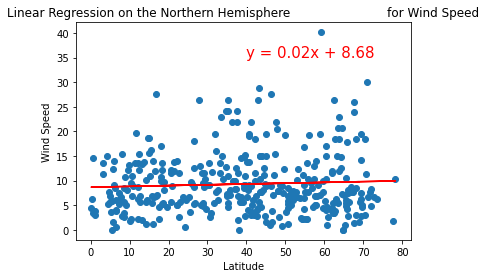

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

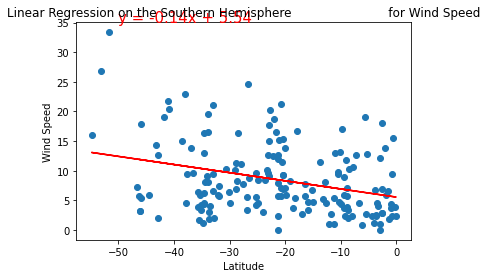

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))